# CUSTOMER CHURN PREDICTION
## Predictive Analysis of Customer Churn and Retention Strategies
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Aim and Objective
The goal of this project is to develop a customer churn prediction model that can accurately identify customers at risk of churn. By proactively identifying potential churners, businesses can implement targeted retention strategies to reduce customer attrition and improve overall customer satisfaction and profitability.

# 1) Introduction
# Dataset info
The dataset contains fictitious customer information of a telco company in California providing various service such as phone service, internet service, streaming service and more.

The data indicates if a user has churned, the services user signed up for and the users' demographic information.

## Identifier
- CustomerID: A unique ID that identifies each customer.

## Independent variable
- Churn: Yes = the customer left the company this quarter. No = the customer remained with the company.

## Demographic information

- Gender: The customer’s gender: Male, Female
- SeniorCitizen: Indicates if the customer is 65 or older: Yes, No
- Partner: Indicates if the customer is married: Yes, No
- Dependents: Indicates if the customer lives with any dependents: Yes, No.


## Services
- PhoneService: Indicates if the customer subscribes to home phone service with the company: Yes, No
- MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- InternetService: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

## Customer account information
- tenure: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- PaperlessBilling: Indicates if the customer has chosen paperless billing: Yes, No
- PaymentMethod: Indicates how the customer pays their bill: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
- MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
- TotalCharges: The total amount charged to the customer

An analysis will be conducted to understand factors affecting customer churn. We also want to predict if a customer is going to churn.

# 2) Importing Libs

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

#Importing SMOTE for data balancing
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# 3) Loading dataset

In [3]:
df = pd.read_csv("Customer-Churn.csv")

# 4) Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# checking duplicates in data
df.duplicated().sum()

0

In [7]:
# Describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

- High cardinality columns are non-categorical columns
-  Next, we group the features into two buckets (categorical and numerical) for easier analysis

In [9]:
categorical = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
numeric = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

- available categorical feature

In [10]:
def categorical_list(category_col):
    df_values = pd.DataFrame()
    for col in category_col:
        values = category_col[col].unique().tolist()
        values_string = ', '.join(map(str, values))
        df_values[col] = [values_string]
    return df_values.rename({0:'data variation'}).T

categorical_list(categorical)

,data variation
gender,"Female, Male"
SeniorCitizen,"0, 1"
Partner,"Yes, No"
Dependents,"No, Yes"
PhoneService,"No, Yes"
MultipleLines,"No phone service, No, Yes"
InternetService,"DSL, Fiber optic, No"
OnlineSecurity,"No, Yes, No internet service"
OnlineBackup,"Yes, No, No internet service"
DeviceProtection,"No, Yes, No internet service"


In [11]:
# customerID is not needed
df.drop('customerID', axis=1, inplace=True)

# TotalCharges should be numeric
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

# SeniorCitizen feature should be an object type, not int
df['SeniorCitizen'] = df['SeniorCitizen'].astype("O")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# 4.1. Analysis of Categorical Variables


 ———————————————————— gender ————————————————————
        COUNT  RATIO
gender              
Male     3555  50.48
Female   3488  49.52




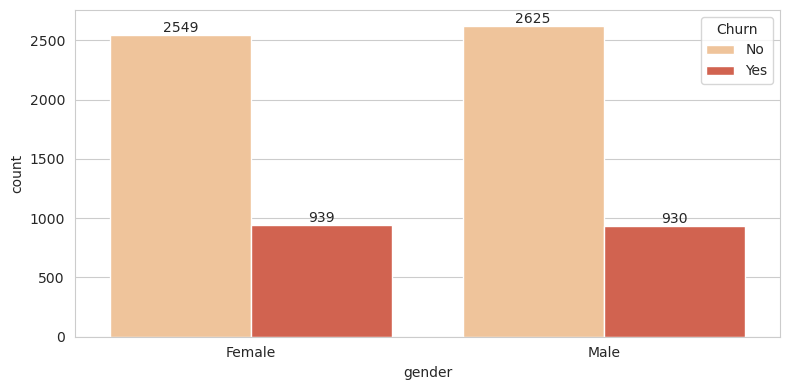


 ———————————————————— SeniorCitizen ————————————————————
               COUNT  RATIO
SeniorCitizen              
0               5901  83.79
1               1142  16.21




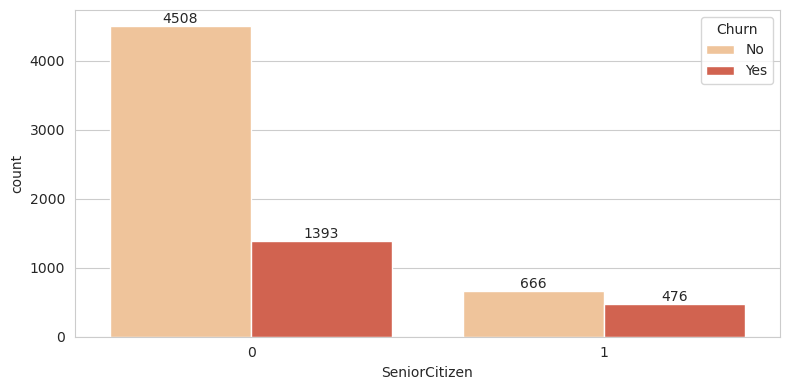


 ———————————————————— Partner ————————————————————
         COUNT  RATIO
Partner              
No        3641   51.7
Yes       3402   48.3




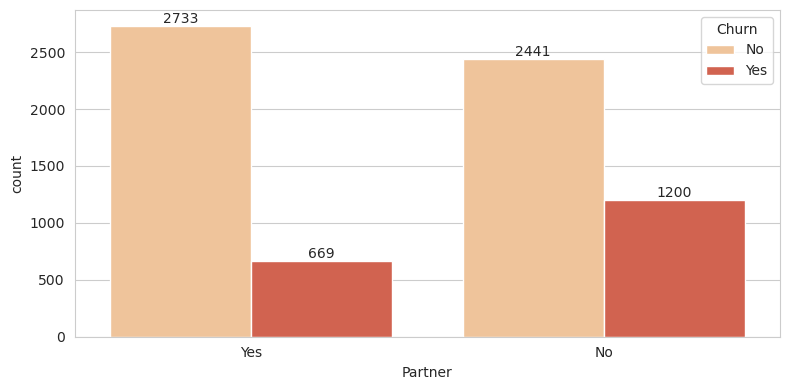


 ———————————————————— Dependents ————————————————————
            COUNT  RATIO
Dependents              
No           4933  70.04
Yes          2110  29.96




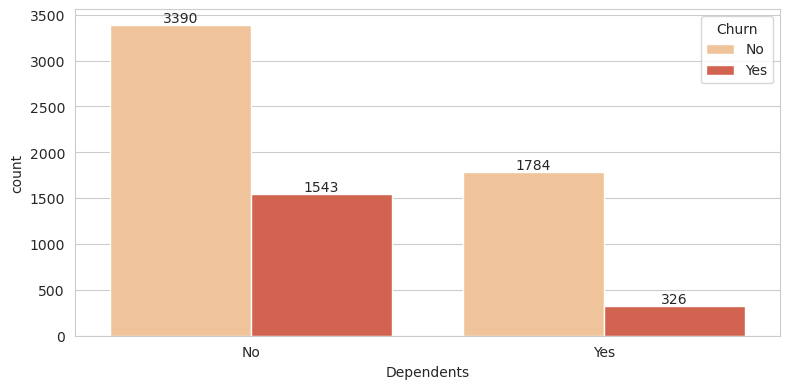


 ———————————————————— PhoneService ————————————————————
              COUNT  RATIO
PhoneService              
Yes            6361  90.32
No              682   9.68




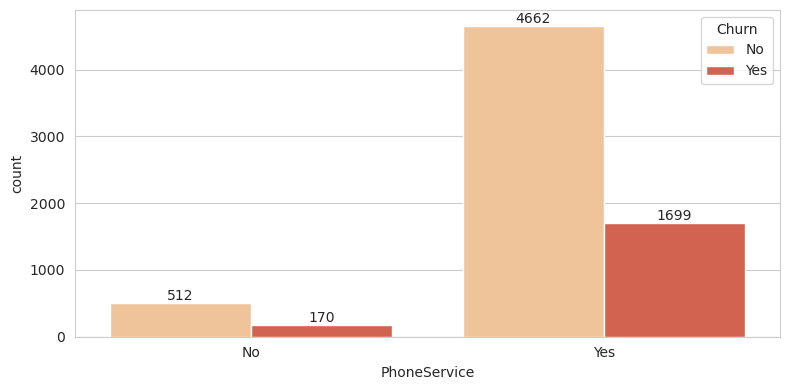


 ———————————————————— MultipleLines ————————————————————
                  COUNT  RATIO
MultipleLines                 
No                 3390  48.13
Yes                2971  42.18
No phone service    682   9.68




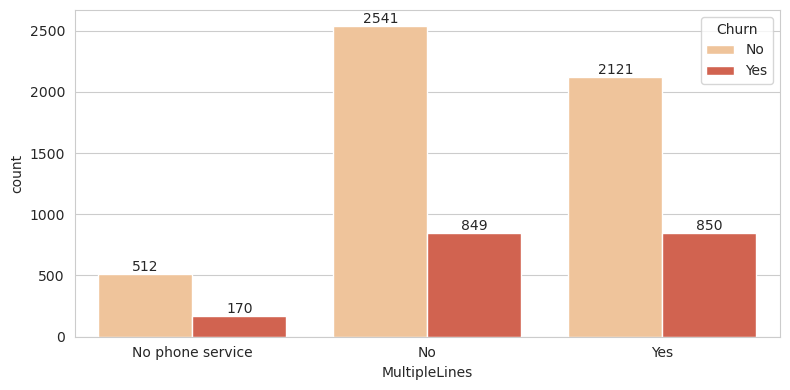


 ———————————————————— InternetService ————————————————————
                 COUNT  RATIO
InternetService              
Fiber optic       3096  43.96
DSL               2421  34.37
No                1526  21.67




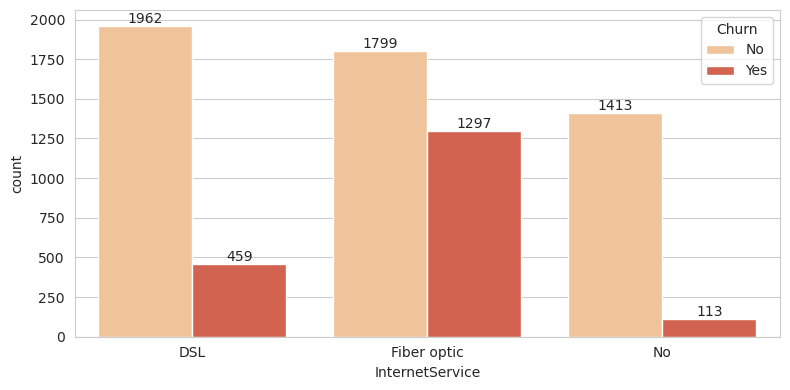


 ———————————————————— OnlineSecurity ————————————————————
                     COUNT  RATIO
OnlineSecurity                   
No                    3498  49.67
Yes                   2019  28.67
No internet service   1526  21.67




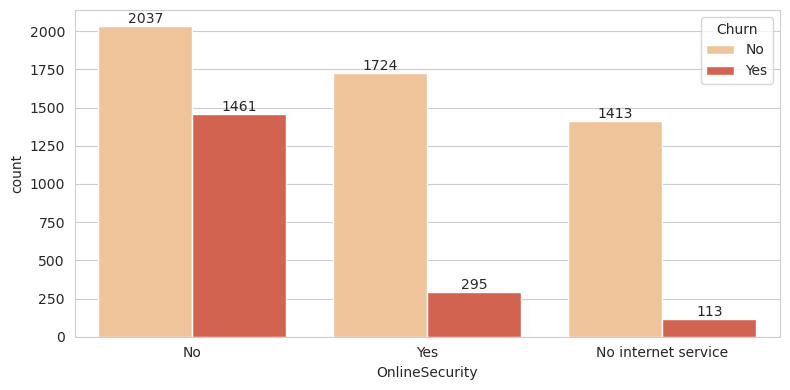


 ———————————————————— OnlineBackup ————————————————————
                     COUNT  RATIO
OnlineBackup                     
No                    3088  43.84
Yes                   2429  34.49
No internet service   1526  21.67




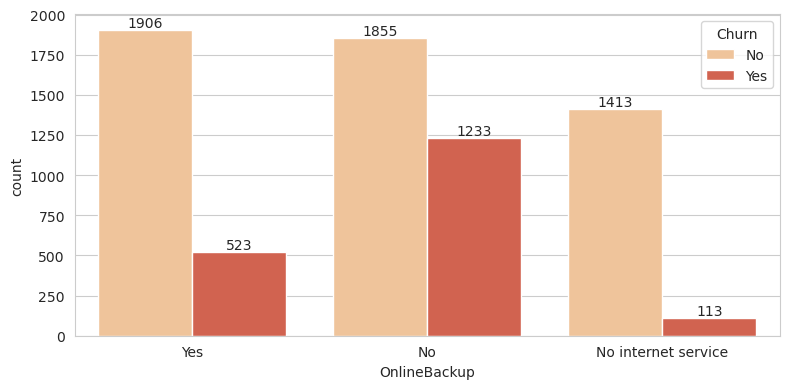


 ———————————————————— DeviceProtection ————————————————————
                     COUNT  RATIO
DeviceProtection                 
No                    3095  43.94
Yes                   2422  34.39
No internet service   1526  21.67




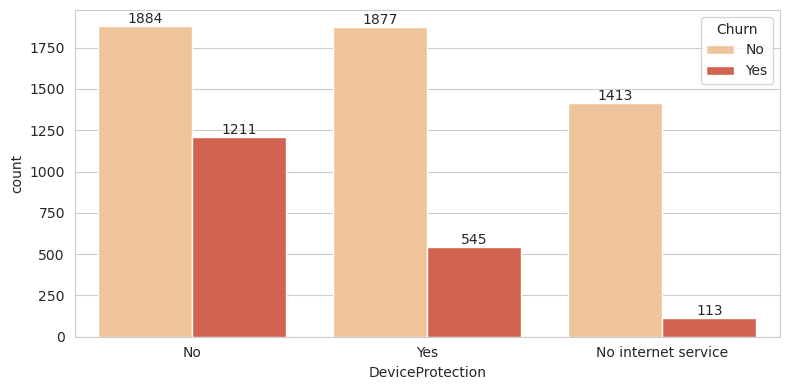


 ———————————————————— TechSupport ————————————————————
                     COUNT  RATIO
TechSupport                      
No                    3473  49.31
Yes                   2044  29.02
No internet service   1526  21.67




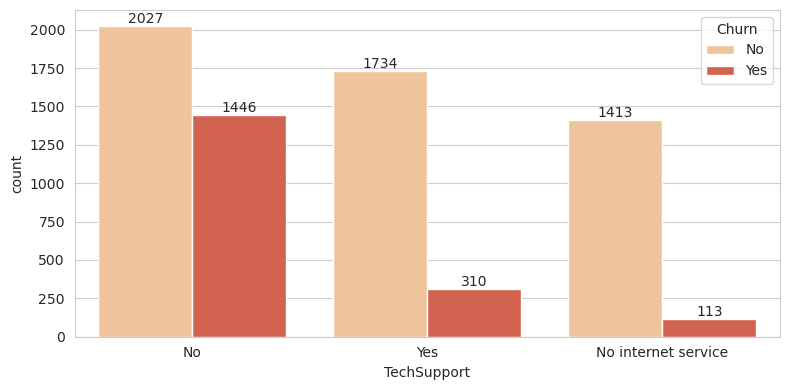


 ———————————————————— StreamingTV ————————————————————
                     COUNT  RATIO
StreamingTV                      
No                    2810  39.90
Yes                   2707  38.44
No internet service   1526  21.67




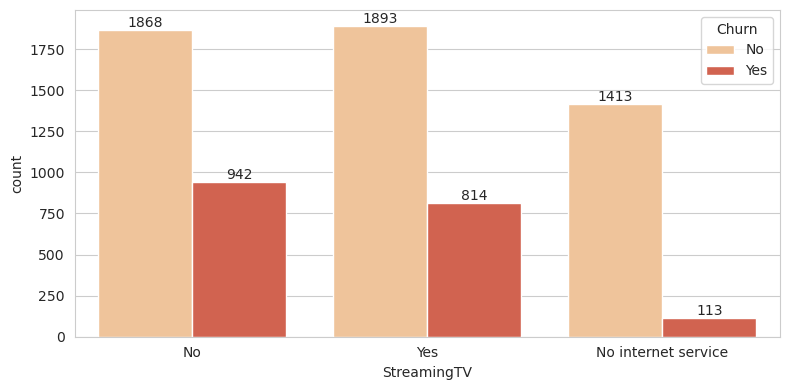


 ———————————————————— StreamingMovies ————————————————————
                     COUNT  RATIO
StreamingMovies                  
No                    2785  39.54
Yes                   2732  38.79
No internet service   1526  21.67




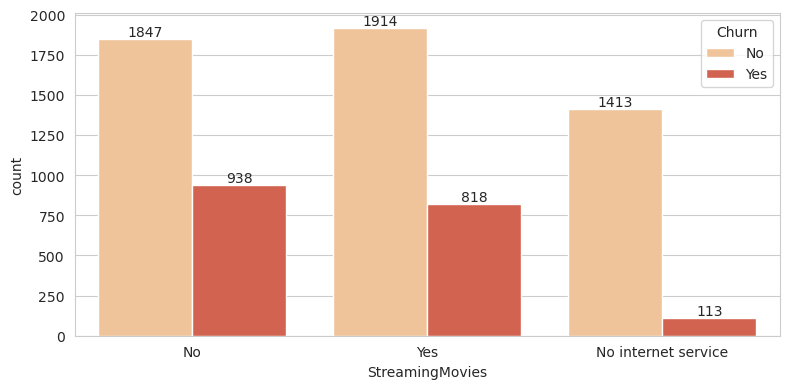


 ———————————————————— Contract ————————————————————
                COUNT  RATIO
Contract                    
Month-to-month   3875  55.02
Two year         1695  24.07
One year         1473  20.91




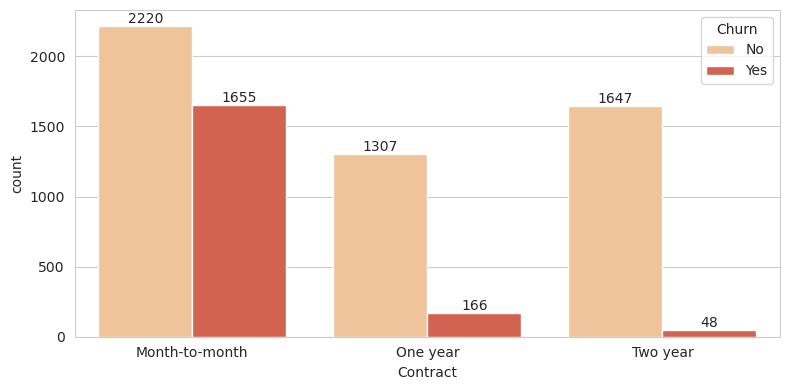


 ———————————————————— PaperlessBilling ————————————————————
                  COUNT  RATIO
PaperlessBilling              
Yes                4171  59.22
No                 2872  40.78




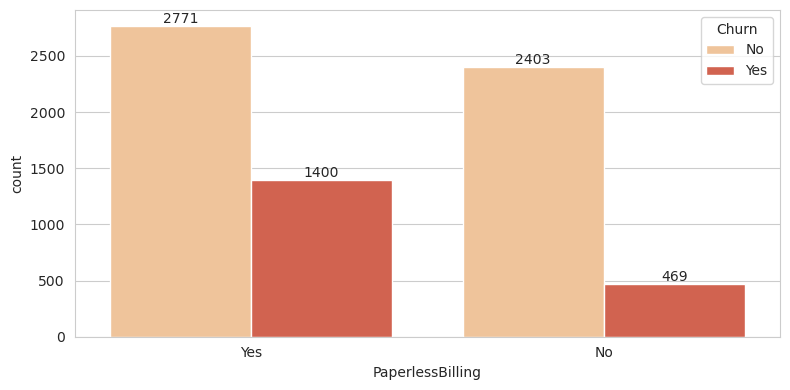


 ———————————————————— PaymentMethod ————————————————————
                           COUNT  RATIO
PaymentMethod                          
Electronic check            2365  33.58
Mailed check                1612  22.89
Bank transfer (automatic)   1544  21.92
Credit card (automatic)     1522  21.61




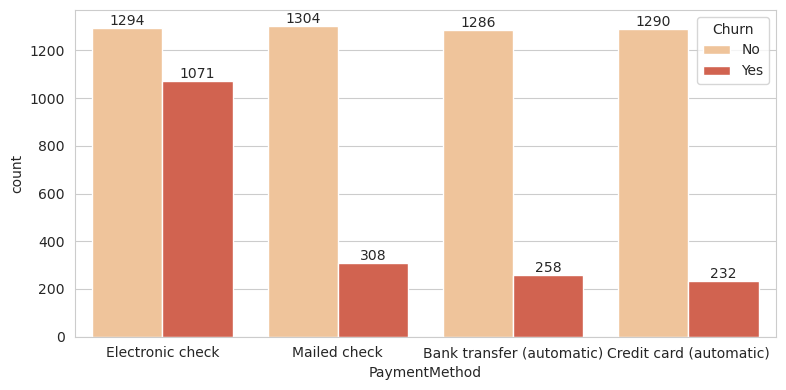


 ———————————————————— Churn ————————————————————
       COUNT  RATIO
Churn              
No      5174  73.46
Yes     1869  26.54




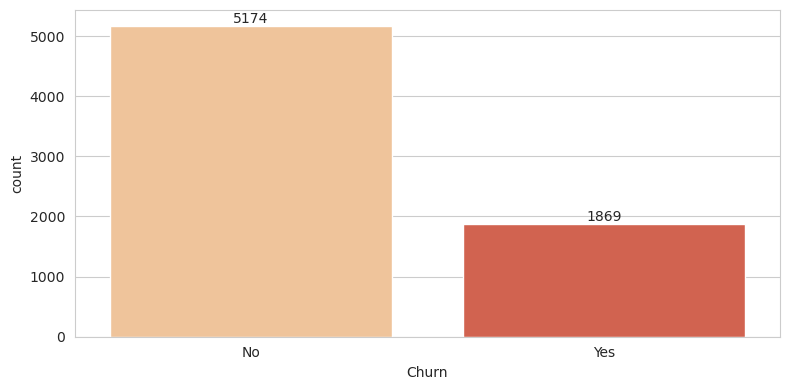

In [13]:
def cat_summary(dataframe, col):
    
    sns.set_style('whitegrid')
    for i in col:
        plt.figure(figsize=(8,4))
        print('\n' , 20*"—" , i, 20*"—")
        print(pd.DataFrame({"COUNT": col[i].value_counts(), "RATIO": round(100*col[i].value_counts()/len(col),2)}), end='\n\n\n')
        ax = sns.countplot(x=col[i], data=dataframe, hue='Churn', palette='OrRd')
        
        for container in ax.containers:
            ax.bar_label(container)
        
        plt.tight_layout()
        plt.show()

cat_summary(df, categorical)

- Observations:
    1. Gender appears to be well balanced when it comes to churn
    2. While most users are not senior citizen, the churn rate for senior citizen is higher
    3. Those who have a partner or dependents are less likely to churn
    4. Customers on monthly contract has very high churn rate as compared to other contracts
    5. Customers who make payment via electronic check has high churn rate as compared to other payment methods
    6. Overall churn rate is at 26.5%

# 4.2. Analysis of Numerical Variables


 ———————————————————— tenure ————————————————————


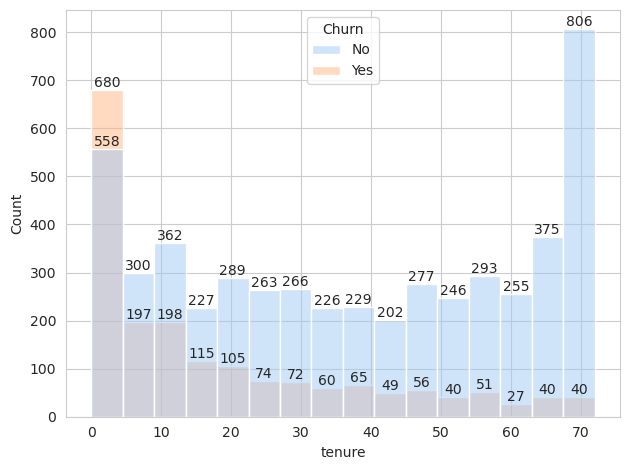

In [14]:
print('\n' , 20*"—" , 'tenure', 20*"—")
ax = sns.histplot(data=df, x='tenure', hue='Churn', palette='pastel')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

>> Churn is significantly higher when tenure is low


 ———————————————————— MonthlyCharges ————————————————————


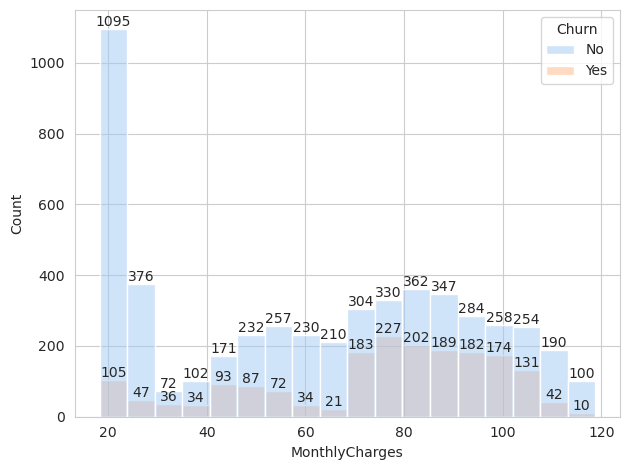

In [15]:
print('\n' , 20*"—" , 'MonthlyCharges', 20*"—")
ax = sns.histplot(data=df, x='MonthlyCharges', hue='Churn', palette='pastel')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

>> Churn rate seems to increase around monthly charges of 70-100


 ———————————————————— TotalCharges ————————————————————


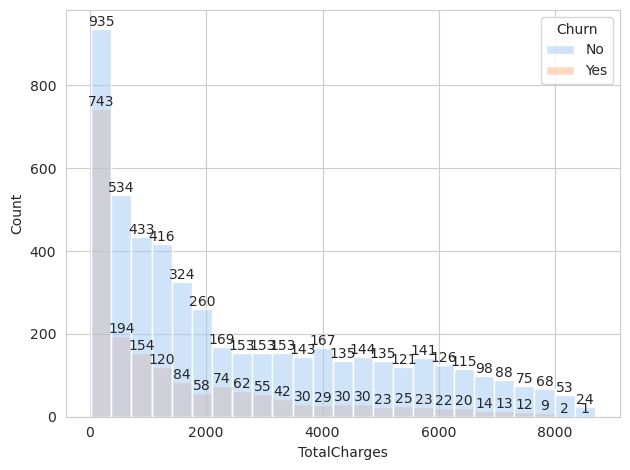

In [16]:
print('\n' , 20*"—" , 'TotalCharges', 20*"—")
ax = sns.histplot(data=df, x='TotalCharges', hue='Churn', palette='pastel')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

>> Churn rate is significantly high on the low end of total charges

>> Overall (tenure, monthly charges & total charges) seems to be telling the story that shorter tenure customers have high churn rate

# 5. Data Preprocessing
## 5.1. Label Encoding

In [17]:
binary_cols = df.select_dtypes(exclude=np.number).loc[:, df.nunique() == 2]

def lbe(dataframe, col):
    labelencoder = LabelEncoder()
    
    for i in col:
        dataframe[i] = labelencoder.fit_transform(dataframe[i])
    return dataframe

lbe(df, binary_cols)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [18]:
ohe_cols = [col for col in categorical if (col not in binary_cols) and df[col].nunique() > 2]
ohe_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
# Noticed how there's no phone service and no internet service category in some of the feature. It needs to be managed to avoid multicollinearity issue
df.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## 5.2. One Hot Encoding

In [22]:
ohe = OneHotEncoder(drop='if_binary') ## For features where it only has two values, we want to drop one column to prevent multicollinearity
ohe_values = ohe.fit_transform(df[ohe_cols]).toarray()
ohe_df = pd.DataFrame(ohe_values, columns=ohe.get_feature_names_out())

In [23]:
df = pd.concat([df.drop(ohe_cols, axis=1),ohe_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_Yes                        7043 no

## 5.3. Correlation Analysis

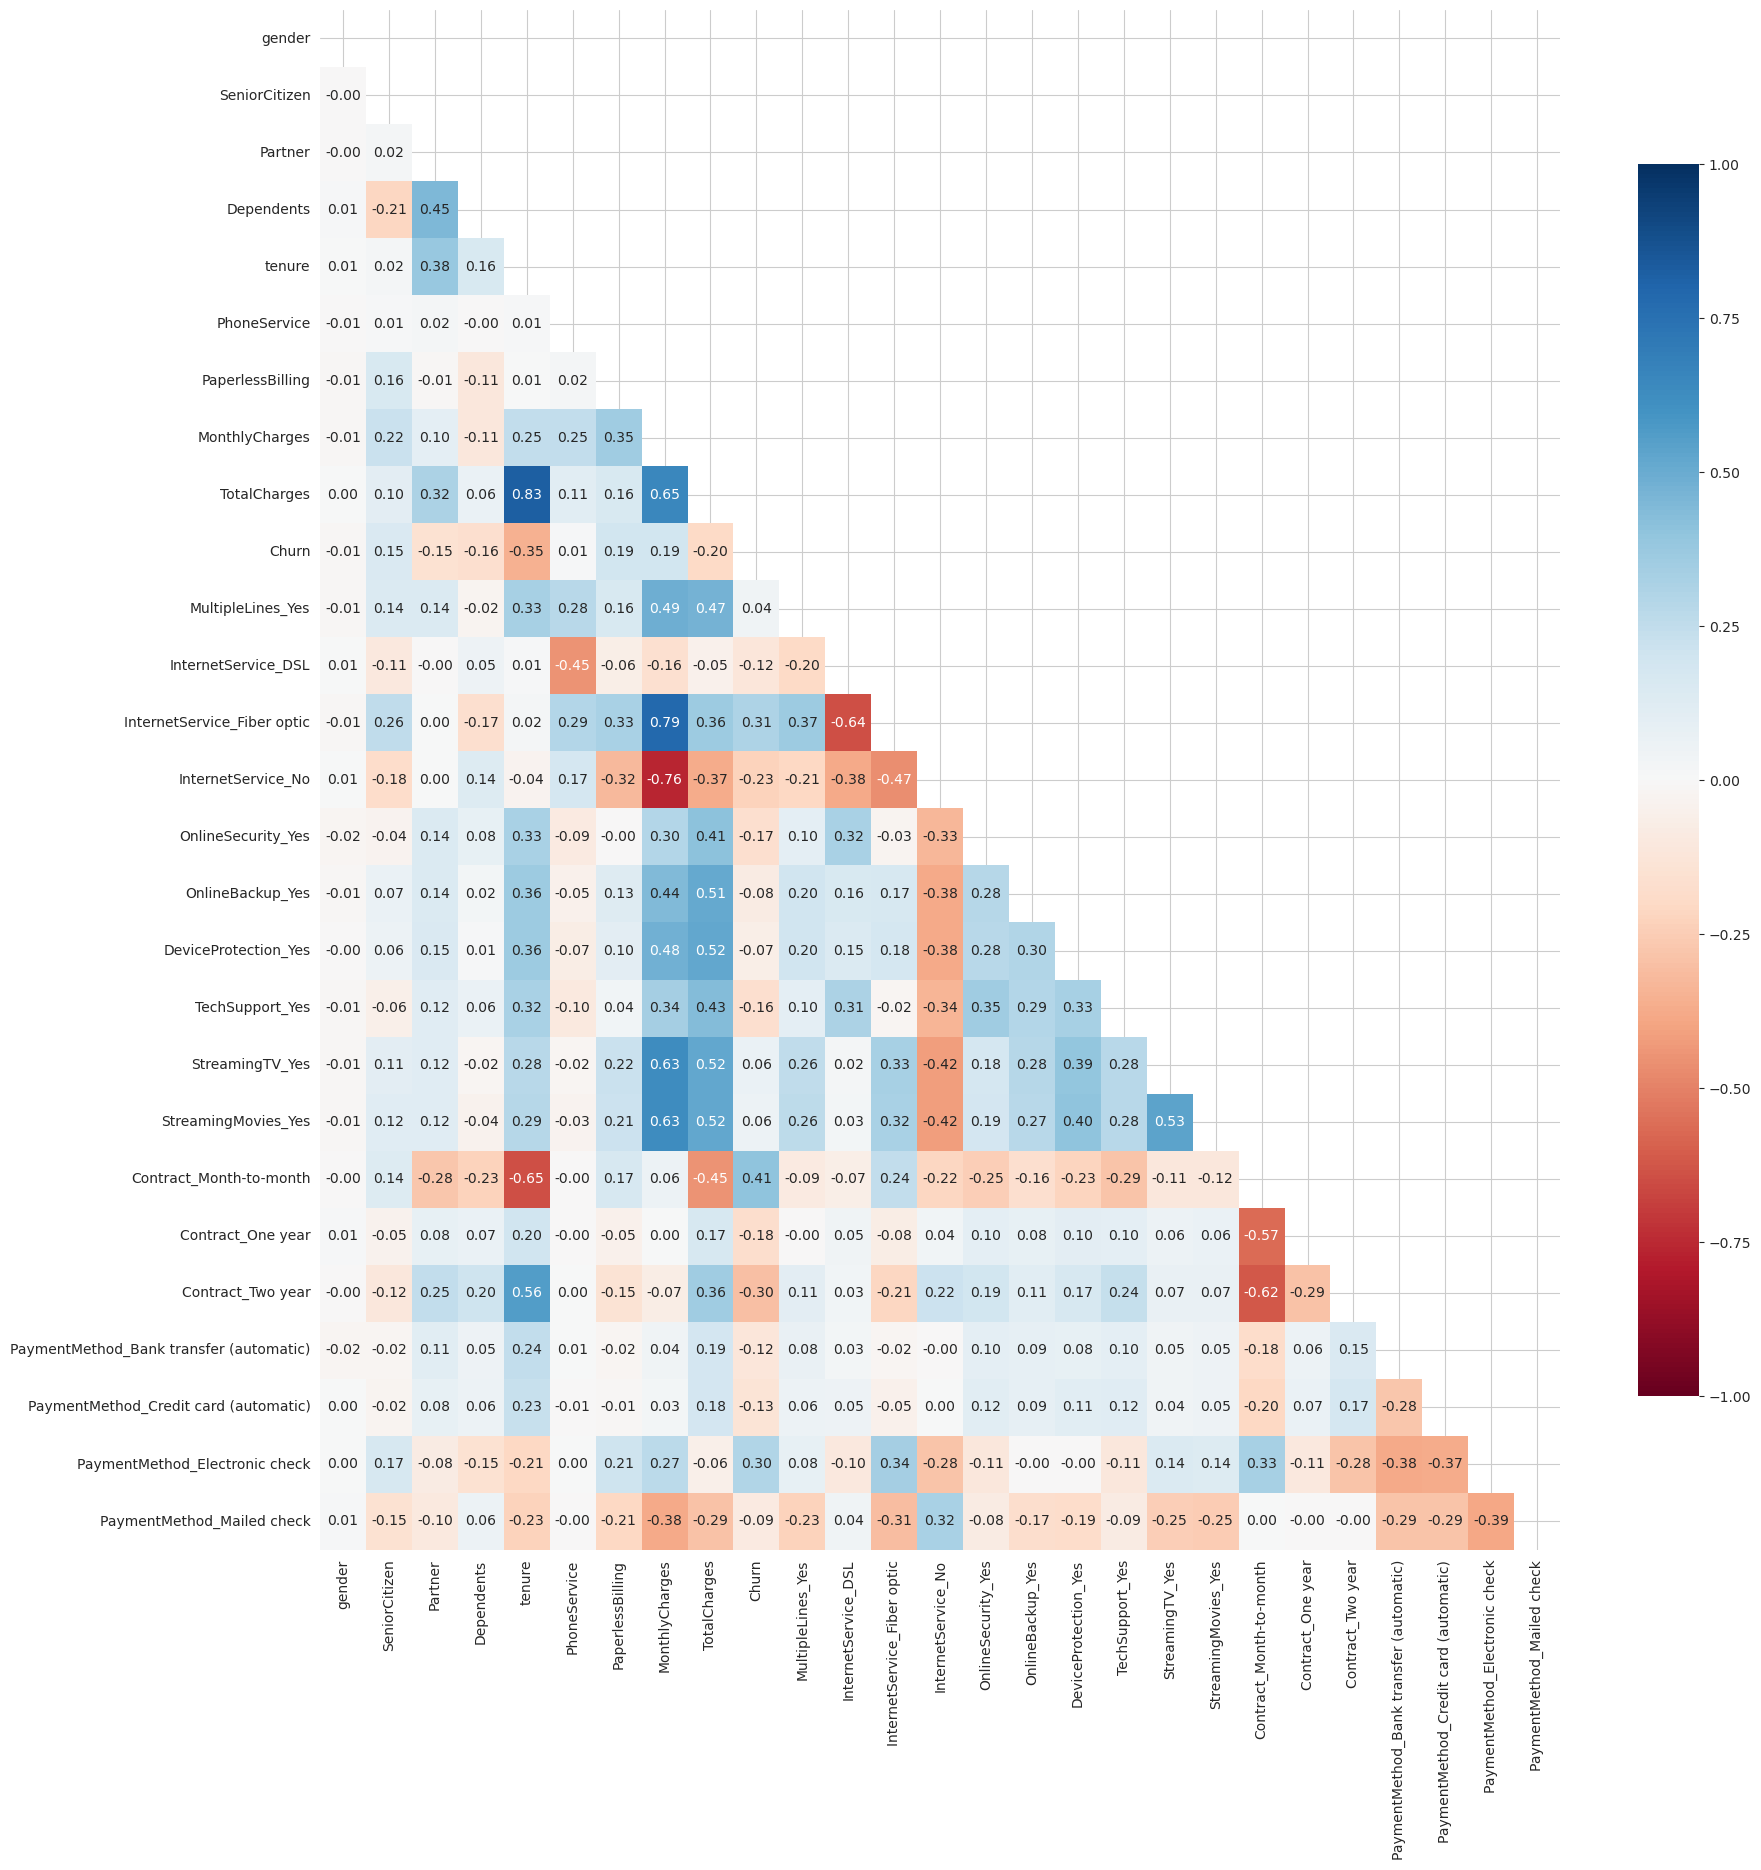

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
matrix = np.triu(corr)

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.set_style('white')
heatmap = sns.heatmap(df.corr(), annot=True, mask=matrix, fmt=".2f", cmap='RdBu', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.show()

In [25]:
positive_corr = round(df.corr()['Churn'].sort_values(ascending=False)[lambda x: x > 0][lambda x: x < 1],2)
negative_corr = round(df.corr()['Churn'].sort_values(ascending=True)[lambda x: x > -1][lambda x: x < 0],2)

/tmp/ipykernel_9627/2356468064.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=positive_corr.values, y=positive_corr.index, palette = 'Reds_r')


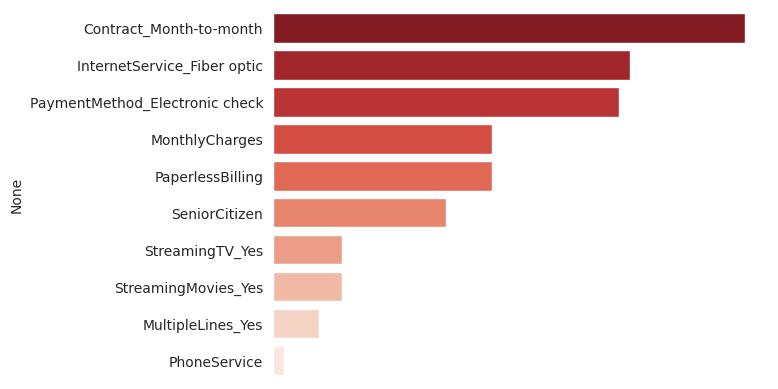

In [26]:
ax = sns.barplot(x=positive_corr.values, y=positive_corr.index, palette = 'Reds_r')
ax.bar_label(container, label_type='edge', padding=3)

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

- Contract month to month has 0.41 correlation to churn.
- Internet service fiber optic has 0.31 correlation to churn.
- Electronic check payment method has 0.3 correlation to churn.

/tmp/ipykernel_9627/3487774063.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=negative_corr.values, y=negative_corr.index, palette = 'Blues_r')


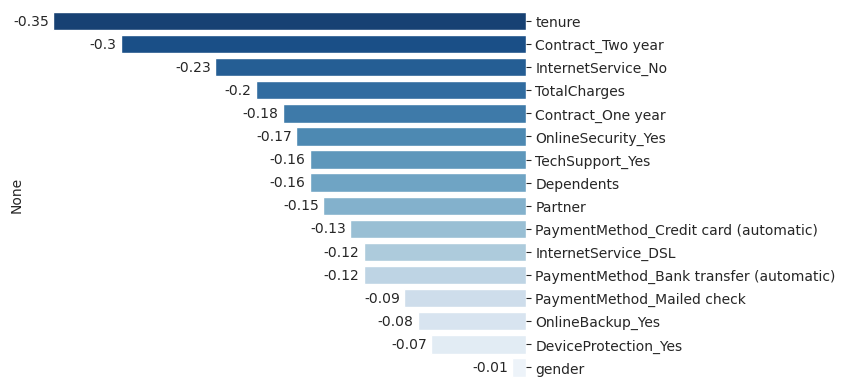

In [27]:
ax = sns.barplot(x=negative_corr.values, y=negative_corr.index, palette = 'Blues_r')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

# ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels([])

sns.despine(left=True, bottom=True)
plt.show()

- Tenure has -0.35 correlation to churn.
- Two year contract has -0.3 correlation to churn.
- No internet service has -0.23 correlation to churn.

- In essence, longer tenure has negative correlation to churn

## 5.4. Outlier Analysis
- Check for outliers using the IQR method

In [28]:
def outlier_limits(dataframe, col, q1=0.25, q3=0.75):
    quartile1 = dataframe[col].quantile(q1)
    quartile3 = dataframe[col].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + IQR*1.5
    low_limit = quartile1 - IQR*1.5
    return up_limit, low_limit

In [29]:
def check_outlier(dataframe, col):
    up_limit, low_limit = outlier_limits(dataframe, col)
    
    if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [30]:
for col in numeric:
    print(col, "--", check_outlier(df, col))

tenure -- False
MonthlyCharges -- False
TotalCharges -- False


-- No outlier found

## 5.5. Missing Data Analysis

In [31]:
na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

missing_df = []

for col in na_columns:
    missing_rows = df[col].isnull().sum()
    percent_missing = round(df[col].isnull().sum()/df[col].shape[0]*100,2)

    result = pd.DataFrame({
                        "Total missing rows": missing_rows, 
                        "Percent of missing values": percent_missing 
                        }, index=[col])
    missing_df.append(result)

final_result = pd.concat(missing_df)
final_result

,Total missing rows,Percent of missing values
TotalCharges,11,0.16


In [32]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,1,1,0,0,1,52.55,NaN,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
753,1,0,0,1,0,1,0,20.25,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
936,0,0,1,1,0,1,0,80.85,NaN,0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1082,1,0,1,1,0,1,0,25.75,NaN,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1340,0,0,1,1,0,0,0,56.05,NaN,0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3331,1,0,1,1,0,1,0,19.85,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3826,1,0,1,1,0,1,0,25.35,NaN,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4380,0,0,1,1,0,1,0,20.00,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5218,1,0,1,1,0,1,1,19.70,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6670,0,0,1,1,0,1,0,73.35,NaN,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


- Few things I noticed here:
    1. All users with blank TotalCharges has 0 as tenure
    2. All users with blank TotalCharges has not churn
    3. While TotalCharges are blank, MonthlyCharges are not.

- I believe this means that these customers are still an active customer who has not completed their first month with the company

- Would it makes sense to just set MonthlyCharges as the TotalCharges?

In [33]:
check_totalcharges = df.copy()
check_totalcharges['tc_mc_multiple'] = (df['TotalCharges']/df['MonthlyCharges'])
check_totalcharges[['tenure', 'TotalCharges', 'MonthlyCharges', 'tc_mc_multiple']]

,tenure,TotalCharges,MonthlyCharges,tc_mc_multiple
0,1,29.85,29.85,1.000000
1,34,1889.50,56.95,33.178227
2,2,108.15,53.85,2.008357
3,45,1840.75,42.30,43.516548
4,2,151.65,70.70,2.144979
...,...,...,...,...
7038,24,1990.50,84.80,23.472877
7039,72,7362.90,103.20,71.345930
7040,11,346.45,29.60,11.704392
7041,4,306.60,74.40,4.120968


In [34]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

/tmp/ipykernel_9627/1331256907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)


In [35]:
df['TotalCharges'].isnull().sum()

0

## 5.6. Feature Scaling

In [36]:
scaler = StandardScaler()
df[numeric.columns.tolist()] = scaler.fit_transform(df[numeric.columns.tolist()])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.992667,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.172198,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.958122,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.514251,0,0,-0.746535,-0.193706,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.938930,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 6. Model Development and Evaluation

## Handling Imbalanced Data using SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance in machine learning. In our dataset, the number of instances in the minority class (Churned) is much smaller than the number of instances in the majority class (those who did not churn). This can lead to poor performance of our machine learning models, as they tend to be biased towards the majority class.

The basic idea behind SMOTE is to create new minority class samples by randomly selecting one or more of the k-nearest neighbors of each minority class sample, and using them to create new synthetic samples (Nababan et al., 2023).

In [37]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [38]:
#Cloning the class SMOTE and specifying the sampling strategy
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled= smote.fit_resample(X, y)
y_resampled.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [39]:
print(X_resampled.shape)
print(y_resampled.shape)

(10348, 26)
(10348,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [41]:
# Using stratified KFold as the dataset is not balanced
skfold = StratifiedKFold(n_splits=5)

In [42]:
def check_scoring(scorings):
    for x in scorings:
        if x not in ('fit_time', 'score_time'):
            print(f"{x[5:].capitalize()}: {round(scorings[x].mean(),3)}")

## 6.1. Logistic Regression

In [43]:
lm = LogisticRegression()
lm_scores = cross_validate(lm, X_resampled, y_resampled, cv=skfold, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
check_scoring(lm_scores)

Accuracy: 0.776
Precision: 0.756
Recall: 0.814
F1: 0.784
Roc_auc: 0.856


## 6.2. Decision Tree

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree_scores = cross_validate(decision_tree, X_resampled, y_resampled, cv=skfold, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
check_scoring(decision_tree_scores)

Accuracy: 0.783
Precision: 0.781
Recall: 0.787
F1: 0.78
Roc_auc: 0.783


## 6.3. Random Forest

In [45]:
!pip install shap

In [46]:
import shap
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, X_resampled, y_resampled, cv=skfold, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
check_scoring(rfc_scores)

Accuracy: 0.853
Precision: 0.841
Recall: 0.871
F1: 0.853
Roc_auc: 0.927


In [47]:
# Hyperparameter tunning
rf_params = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None,2,3,5,10,20], 
    'max_features': ['sqrt',2,4,8,16,'log2', None]}

rf_best_grid = GridSearchCV(rfc, rf_params, cv=skfold, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_best_grid.best_params_
rf_final = rfc.set_params(**rf_best_grid.best_params_).fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time=   3.8s
[CV] END ...max_depth=None, max_features=2, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=None, max_features=2, n_estimators=100; total time=   1.0s
[CV] END ...max_depth=None, max_features=2, n_estimators=200; total time=   2.0s
[CV] END ...max_depth=None, max_features=2, n_estimators=300; total time=   2.9s
[CV] END ...max_depth=None, max_features=4, n_estimators=100; total time=   1.2s
[CV] END ...max_depth=None, max_features=4, n_estimators=100; total time=   1.1s
[CV] END ...max_depth=None, max_features=4, n_estimators=200; total time=   2.4s
[CV] END ...max_depth=None, max_features=4, n_

In [48]:
rfc_scores = cross_validate(rf_final, X_resampled, y_resampled, cv=skfold, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
check_scoring(rfc_scores)

Accuracy: 0.853
Precision: 0.839
Recall: 0.873
F1: 0.853
Roc_auc: 0.929


## 6.4. Gradient Boosting

In [49]:
gbm = GradientBoostingClassifier()
gbm_scores = cross_validate(gbm, X_resampled, y_resampled, cv=skfold, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
check_scoring(gbm_scores)

Accuracy: 0.829
Precision: 0.814
Recall: 0.852
F1: 0.829
Roc_auc: 0.914


In [50]:
gbm_params = {
    'learning_rate': [0.01, 0.1], 
    'max_depth': [2,3,5,10,20], 
    'n_estimators': [100, 200, 500],
    'subsample': [0.5, 0.7, 0.9, 1]}

gbm_best_grid = GridSearchCV(gbm, gbm_params, cv=skfold, n_jobs=-1, verbose=2).fit(X_train, y_train)

gbm_best_grid.best_params_
gbm_final = gbm.set_params(**gbm_best_grid.best_params_).fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits

[CV] END ...max_depth=5, max_features=log2, n_estimators=200; total time=   1.2s
[CV] END ...max_depth=5, max_features=log2, n_estimators=300; total time=   1.8s
[CV] END ...max_depth=5, max_features=None, n_estimators=100; total time=   1.8s
[CV] END ...max_depth=5, max_features=None, n_estimators=100; total time=   1.7s
[CV] END ...max_depth=5, max_features=None, n_estimators=200; total time=   3.5s
[CV] END ...max_depth=5, max_features=None, n_estimators=300; total time=   5.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   2.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   1.9s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=300; total time=   2.8s
[CV] END .....max_depth=10, max_features=2, n

In [51]:
gbm_scores = cross_validate(gbm_final, X_resampled, y_resampled, cv=skfold, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
check_scoring(gbm_scores)

Accuracy: 0.845
Precision: 0.847
Recall: 0.842
F1: 0.836
Roc_auc: 0.928


# 6.5. XGBoost Algorithm

In [52]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_scores = cross_validate(xgb, X_resampled, y_resampled, cv=skfold, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
check_scoring(xgb_scores)

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work

Accuracy: 0.841
Precision: 0.843
Recall: 0.84
F1: 0.832
Roc_auc: 0.928


In [53]:
xgb_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 500],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

xgb_best_grid = GridSearchCV(xgb, xgb_params, cv=skfold, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_best_grid.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5; total time=   4.8s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   6.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   5.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   7.0s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1; total time=   7.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.5; total time=   9.7s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7; total time=  11.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7; total time=  11.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.9; total time=  12.8s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1; total time=  14.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, sub

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1; total time=  12.8s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5; total time=   4.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5; total time=   5.0s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   6.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   7.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1; total time=   7.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.5; total time=   9.7s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.5; total time=   9.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7; total time=  11.6s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.9; total time=  13.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subs

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:15:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1; total time=  13.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1; total time=  14.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.5; total time=  21.6s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.7; total time=  26.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.9; total time=  29.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1; total time=  33.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1; total time=  35.3s
[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=  21.1s
[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.7; total time=  24.9s
[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.9; total time=  29.4s
[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, subsamp

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END learning_rate=0.1, max_depth=20, n_estimators=500, subsample=0.5; total time= 1.2min
[CV] END learning_rate=0.1, max_depth=20, n_estimators=500, subsample=0.7; total time= 1.2min
[CV] END learning_rate=0.1, max_depth=20, n_estimators=500, subsample=0.9; total time= 1.3min
[CV] END learning_rate=0.1, max_depth=20, n_estimators=500, subsample=1; total time=  49.0s
[CV] END learning_rate=0.1, max_depth=20, n_estimators=500, subsample=1; total time=  38.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estim

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subs

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subs

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1; total time=   1.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.5; total time=   2.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.7; total time=   2.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1; total time=   2.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:17:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.5; total time=   3.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.7; total time=   3.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1; total time=   2.8s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, s

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work


[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, su

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 100,
 'subsample': 1}

In [54]:
xgb_final = xgb.set_params(**xgb_best_grid.best_params_).fit(X_train, y_train)
xgb_scores = cross_validate(xgb_final, X_resampled, y_resampled, cv=skfold, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
check_scoring(xgb_scores)

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:19:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:19:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:19:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:19:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work

Accuracy: 0.851
Precision: 0.847
Recall: 0.858
F1: 0.845
Roc_auc: 0.935


# 7. Feature Importance

/tmp/ipykernel_9627/352483152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(gbm_final_df, x='Value', y='Feature', palette='Reds_r')


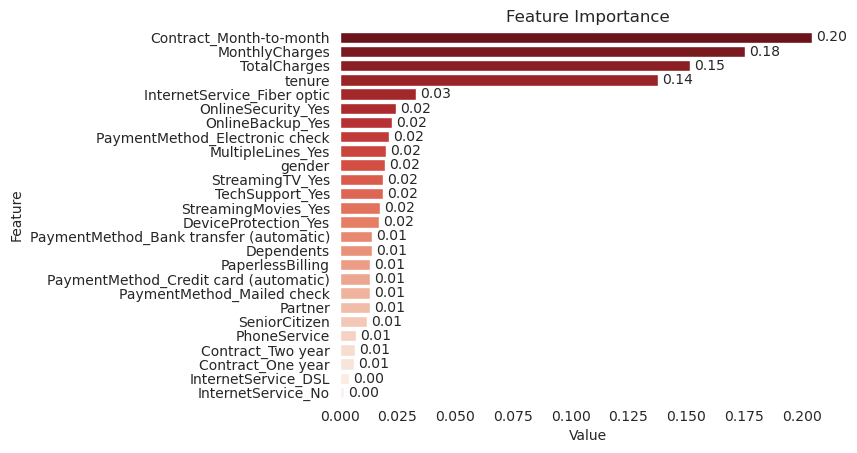

In [55]:
gbm_final_df = pd.DataFrame({"Value": gbm_final.feature_importances_, "Feature": X_train.columns}).sort_values('Value', ascending=False)
sns.set_style('white')
ax = sns.barplot(gbm_final_df, x='Value', y='Feature', palette='Reds_r')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fmt="%.2f")

sns.despine(left=True, bottom=True)
ax.set_title('Feature Importance')
plt.show()

/tmp/ipykernel_9627/318916902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(xgb_final_df, x='Value', y='Feature', palette='Reds_r')


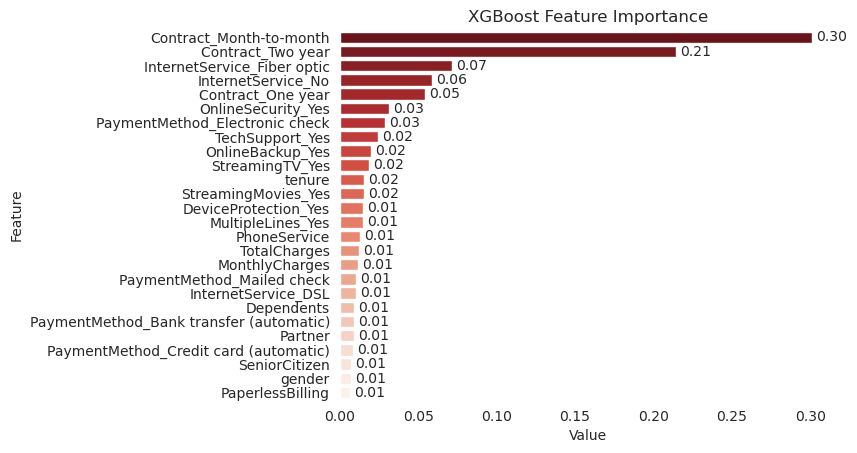

In [56]:
xgb_final_df = pd.DataFrame({"Value": xgb_final.feature_importances_, "Feature": X_train.columns}).sort_values('Value', ascending=False)
sns.set_style('white')
ax = sns.barplot(xgb_final_df, x='Value', y='Feature', palette='Reds_r')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fmt="%.2f")

sns.despine(left=True, bottom=True)
ax.set_title('XGBoost Feature Importance')
plt.show()

# 8. Explaining the Model

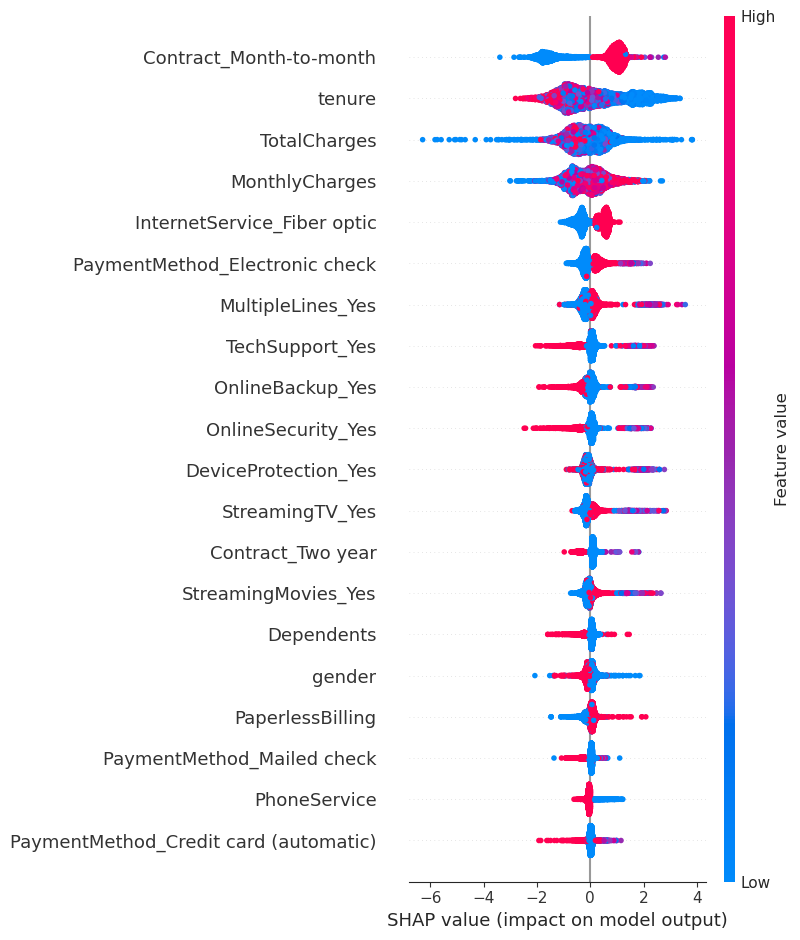

In [57]:
explainer = shap.TreeExplainer(gbm_final)
shap_explanation = explainer(X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

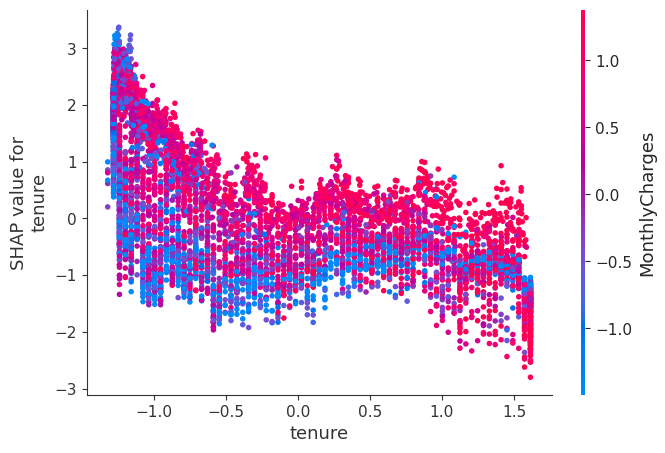

In [58]:
shap.dependence_plot("tenure", shap_values, X_train)

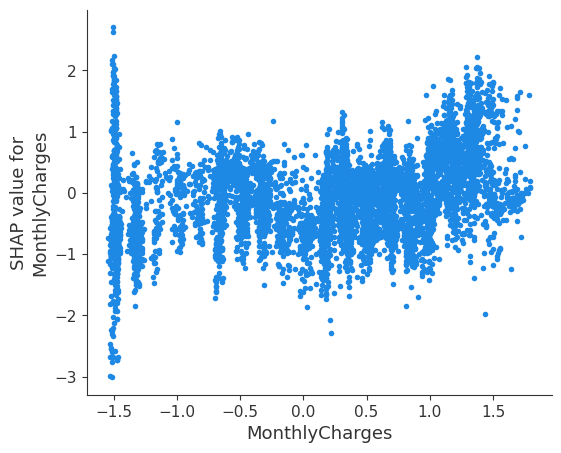

In [59]:
shap.dependence_plot("MonthlyCharges", shap_values, X_train, interaction_index=None)

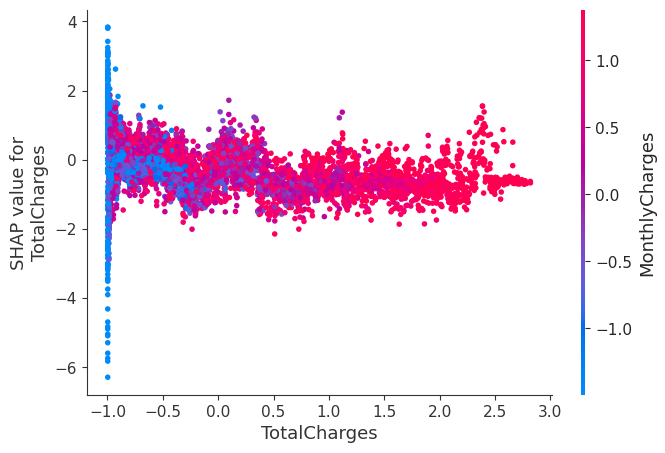

In [60]:
shap.dependence_plot("TotalCharges", shap_values, X_train)

# 9. Test Prediction

In [61]:
predictions = gbm_final.predict(X_test)

In [62]:
output = pd.DataFrame({"Customer": X_test.reset_index()['index'], "Churn":predictions})
output.head()

,Customer,Churn
0,9428,1
1,4593,1
2,5379,0
3,8918,0
4,6448,1



[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.5; total time=   1.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.5; to

# 10. Conclusion

Final model: Gradient Boosting and Xgboost

- If interpretability is key, Gradient Boosting with SHAP explanations might be preferable.
- If performance and scalability matter more, XGBoost is often the go-to.
- Scorings can be further improved by testing several alternative algorithm.

Recommendations to business stakeholders:

1. Conduct user surveys to understand the factors causing user churn.
2. Conduct time series analysis to understand if there was a particular shift in churn rate at a certain point in time. If there was, identifying that particular time could help to isolate and further understand churn reasons. For example, perhaps there was a price change or product change that inadvertedly increased churn.
3. Acquiring new customers are always more expensive than retaining existing customers. It's important to devise retention scheme or retention bonus to encourage users to continue using the service.
4. Conduct user surveys on EXISTING users who are predicted to churn. Key to understand current users' frustrations and solve for it before they decide to churn.
5. Conduct a user test for fiber optic internet service to see if there's any major issue with the service. There could potentially be an SLA issue or mismatch of users' expectation with what's provided in the service.
6. Similar to point no. 5, a check should also be conducted on the electronic check payment method to understand if there's any issue a user might encounter when using that as a payment method.